<a href="https://colab.research.google.com/github/SaurabhSRP/POC-CNN/blob/main/POC_CNN_Image_Classification_(CAT_vs_DOG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are pulling out the dataset from Kaggle ,
this link takes you to the kaggle page for your reference to pull API commands
https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:05<00:00, 222MB/s]
100% 1.06G/1.06G [00:05<00:00, 192MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
#Lets create generators , this will help send all images in batches , this way we will not run out of memory
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#We will reduce the image size to 256x256 and covert the value to float32 format using tf.cast
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# create CNN model

model = Sequential()
#------------------Convolution network-----------------------------------------------------------------
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
#-----------------------------Nueral network----------------------------
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [15]:
history = model.fit(train_ds,epochs=25,validation_data=validation_ds)

Epoch 1/25
625/625 [==============================] - 76s 120ms/step - loss: 0.7574 - accuracy: 0.6294 - val_loss: 0.6735 - val_accuracy: 0.5698
Epoch 2/25
625/625 [==============================] - 72s 115ms/step - loss: 0.5393 - accuracy: 0.7349 - val_loss: 0.5512 - val_accuracy: 0.7052
Epoch 3/25
625/625 [==============================] - 72s 115ms/step - loss: 0.4484 - accuracy: 0.7913 - val_loss: 0.5314 - val_accuracy: 0.7184
Epoch 4/25
625/625 [==============================] - 72s 115ms/step - loss: 0.3928 - accuracy: 0.8261 - val_loss: 0.5108 - val_accuracy: 0.7604
Epoch 5/25
625/625 [==============================] - 72s 115ms/step - loss: 0.3206 - accuracy: 0.8624 - val_loss: 0.4792 - val_accuracy: 0.7496
Epoch 6/25
625/625 [==============================] - 72s 115ms/step - loss: 0.2542 - accuracy: 0.8913 - val_loss: 0.6634 - val_accuracy: 0.7690
Epoch 7/25
625/625 [==============================] - 72s 115ms/step - loss: 0.1754 - accuracy: 0.9323 - val_loss: 0.5298 - val_ac

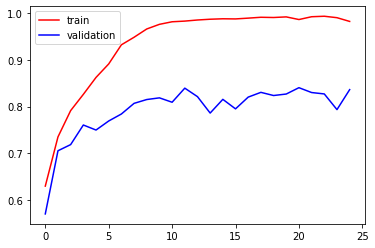

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

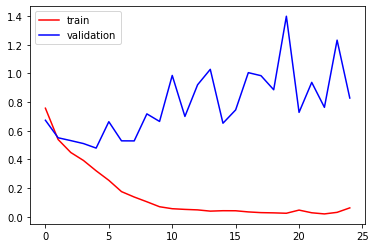

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

###model is overfitting clearly , as it is not able to predict accurately for validation dataset

# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [18]:
import cv2

In [26]:
test_image=cv2.imread('/content/kitty-cat-kitten-pet-45201.jpeg')

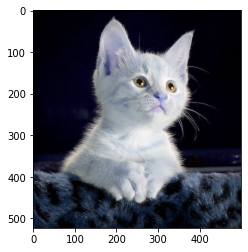

In [27]:
plt.imshow(test_image)

In [28]:
test_image.shape

(523, 500, 3)

In [29]:
test_image = cv2.resize(test_image,(256,256))

In [30]:
test_input = test_image.reshape((1,256,256,3)) #1 refers only one batch of one image 

In [31]:
model.predict(test_input)

1/1 [==============================] - 0s 16ms/step


array([[0.]], dtype=float32)